In [ ]:
# Fast Fourier Transform on Financial Time Series

FFT is used on a financial time series to extract the signal from the noise. The time series is transformed to the frequency graph where a threshold can be defined. This can act as a filter. The signal is then transformed back using the inverse FFT.


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf
from datetime import date

Download the ticker symbol from Yahoo! Finance

In [122]:
START = "2020-01-01"
TODAY = date.today().strftime("%Y-%m-%d")
ticker = "MSFT"

In [123]:
data = yf.download(ticker, START, TODAY)
data.reset_index(inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-31,156.770004,157.770004,156.449997,157.699997,155.329636,18369400
1,2020-01-02,158.779999,160.729996,158.330002,160.619995,158.205765,22622100
2,2020-01-03,158.320007,159.949997,158.059998,158.619995,156.235825,21116200
3,2020-01-06,157.080002,159.100006,156.509995,159.029999,156.639694,20813700
4,2020-01-07,159.320007,159.669998,157.320007,157.580002,155.211456,21634100


In [124]:
dt = 1/data.shape[0]
t = np.arange(0, 1, dt)
f = data['Adj Close']

Setting up plotting parameters

In [125]:
sns.set()
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({'font.size': 18})

Plot the ticker after normalizing the time dimension

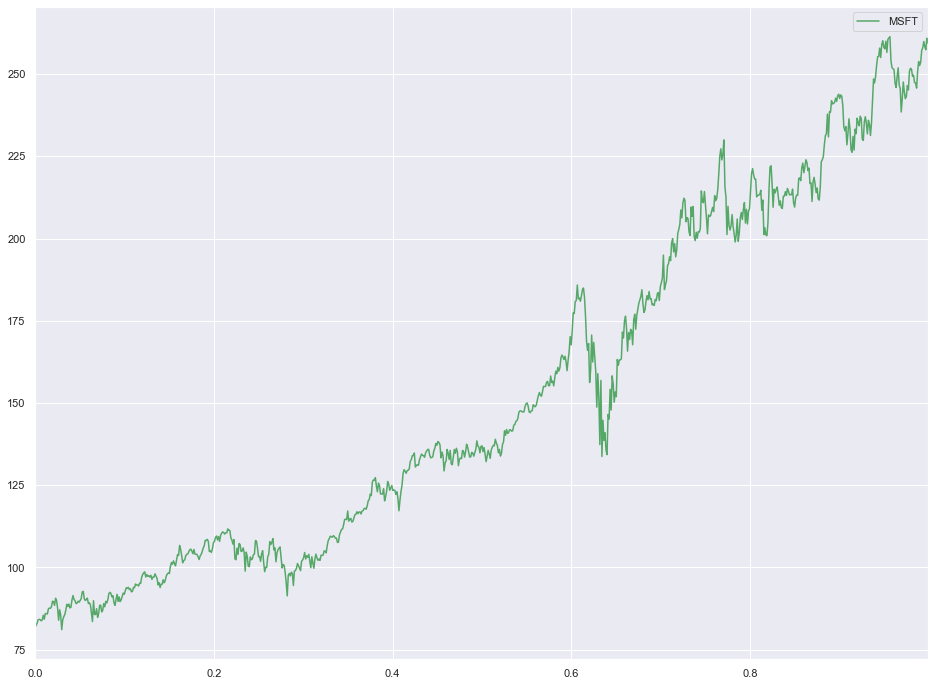

In [103]:
plt.plot(t, f, color='g', linewidth=1.5, label=ticker)
plt.xlim(t[0], t[-1])
plt.legend()

Compute the Fast Fourier Transform (FFT)

In [134]:
n = len(t)
f_hat = np.fft.fft(f, n)
power_spectrum_density = f_hat * np.conj(f_hat) / n
frequency = (1 / (dt * n)) * np.arange(n)
L = np.arange(1, np.floor(n / 2), dtype='int')

C:\Users\Steel\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


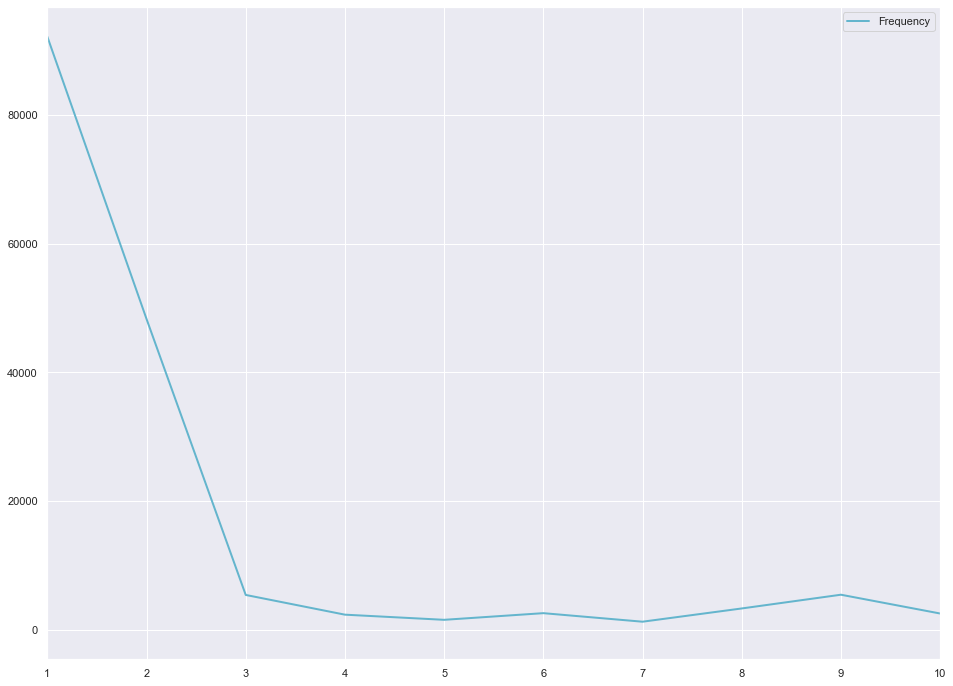

In [135]:
plt.plot(frequency[L], power_spectrum_density[L], color='c', linewidth=2, label='Frequency')
plt.xlim(frequency[L[0]], 10)
plt.legend()

plt.show()

In [138]:

fig, axs = plt.subplots(4, 1)


plt.sca(axs[0])
plt.plot(t, f, color='r', linewidth=1.5, label=ticker)
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, f_filtered, color='k', linewidth=1.5, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(frequency[L], power_spectrum_density[L], color='c', linewidth=2, label='All Frequencies')
plt.xlim(frequency[L[0]], frequency[L[-1]])
plt.legend()

plt.sca(axs[3])
plt.plot(frequency[L], power_spectrum_density_clean[L], color='r', linewidth=1.5, label='Filtered Frequencies')
plt.xlim(frequency[L[0]], frequency[L[-1]])
plt.legend()

plt.show()

In [ ]:
threshold = 500
indices = power_spectrum_density > threshold
power_spectrum_density_clean = power_spectrum_density * indices
f_hat = indices * f_hat
f_filtered = np.fft.ifft(f_hat)